<a href="https://colab.research.google.com/github/camocola/ADA-informes/blob/main/informe8_OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema: Árbol binario de búsqueda óptimo**



**Entrada**: Secuencia ordenada de $n$ claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Árbol de búsqueda óptimo que minimice la cantidad esperada de nodos visitados (costo esperado).

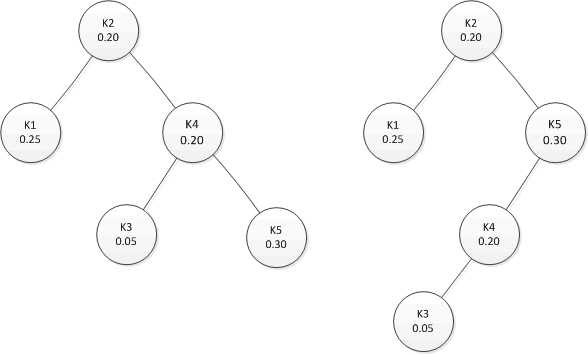

En el siguiente informe se analizará el problema del **árbol binario de búsqueda óptimo**, el cual proporciona el menor tiempo de búsqueda posible para la secuencia de datos ingresada. Los árboles de búsqueda óptimos se dividen en dos tipos: dinámicos y estáticos. La mayor diferencia entre ambos es que en el primero mencionado no se puede modificar el árbol después de ser construido, mientras que el segundo puede ser modificado en cualquier momento, generalmente permitiendo rotaciones de árbol.


# **2. Optimal BST**

El siguiente código muestra una implementación del algoritmo **Optimal BST.**

### Generador de árbol binario

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import random

nullnodes=0
def generate_binary_tree(T,A):
    global nullnodes
    if len(A)==1: 
      T.add_node(A[0])
      return A[0]
    else:
      pivote = random.randint(0,len(A)-1)
      T.add_node(A[pivote])

      if pivote > 0:
        left_node = generate_binary_tree(T,A[0:pivote])
        T.add_edge(A[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      
      if pivote < len(A)-1:
        right_node = generate_binary_tree(T,A[pivote+1:])
        T.add_edge(A[pivote],right_node)
      else: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1

      return A[pivote]

### Optimal BST Recursivo


In [ ]:
import math
from termcolor import colored

#función encargada de encontrar el costo óptimo
def optimalCost(a, b, i, j, cont, verbose = False):
  # Contador de llamadas recursivas
  cont[0] += 1
  # No hay elementos en el arreglo
  if j < i:    
    return b[i-1]
    
  #Obtenemos la suma de probabilidades desde i hasta j
  suma = sum(a[i - 1:j]) + sum(b[i - 1:j+1])
    
  #Inicializamos un valor máximo para la primera comparación
  minimo = math.inf

  if verbose == True:
    print(f"Suma de probabilidades para los nodos {i}...{j} = ", colored(round(suma, 2), 'green'))
    
  for r in range(i, j + 1):
    # Se calcula la suma entre el costo del subárbol izquierdo y el derecho
    costo = (optimalCost(a, b, i, r - 1, cont) + optimalCost(a, b, r + 1, j, cont) + suma)
    if verbose == True:
      print("\n")
      print(f"Costo del árbol de raíz {r} = {colored(round(costo, 2), 'cyan')}")
    # Si el costo obtenido es menor se actualiza el valor del costo mínimo que tenemos
    if costo < minimo:
      minimo = costo
      if verbose == True:
        print(f"Se actualiza el valor del costo óptimo: {colored(round(costo, 2), 'cyan')}\n")

    if costo > minimo and verbose == True:
      print(f"El valor del costo óptimo se mantiene: {colored(round(minimo, 2), 'cyan')}\n")

  #Retornamos el costo más pequeño encontrado
  return minimo 

def recursiveOBST(a, b, n, cont, verbose = False):
  return optimalCost(a, b, 1, n, cont, verbose)

#Ejemplo
cont = [0]
k = [1, 2, 3, 4, 5]
a = [0.15, 0.10, 0.05, 0.10, 0.20]
b = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
print("EL costo óptimo encontrado es:", recursiveOBST(a, b, len(k), cont, verbose = False))
print("Cantidad de llamadas recursivas:", cont[0])

EL costo óptimo encontrado es: 2.75
Cantidad de llamadas recursivas: 243


### Optimal BST dinámico (bottom-up)

El costo mínimo encontrado es: 2.75
Cantidad de subproblemas resueltos: 15


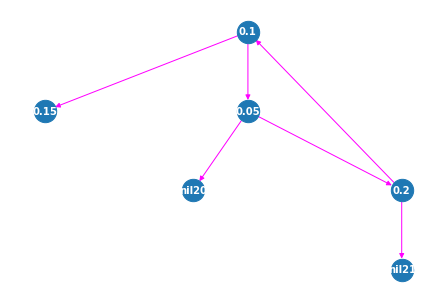

In [ ]:
from binascii import b2a_uu
import math
import numpy as np
import pandas as pd

# a y b son las probabilidades reales y ficticias respectivamente, cont es el contador de subproblemas y n es el largo 
def dynamicOBST(a, b, n, cont, verbose = False): 
  # Subarbol óptimo
  optSubTree = np.zeros((n+2, n+1))

  # Suma de probabilidades
  sumProb = np.zeros((n+2,n+1))

  # Almacena las raíces de los árboles
  root = np.zeros((n+1, n+1), dtype = int)

  if verbose == True:
    print(f"Probabilidades de las claves reales: {np.around(a,3)}")
    print(f"Probabilidades de las claves ficticias: {np.around(b,3)}\n")

  # Calculamos los valores de las búsquedas fallidas
  for i in range(1, n+2):
    optSubTree[i][i-1] = b[i-1]
    sumProb[i][i-1] = b[i-1]
      
  for l in range(1, n + 1):
    for i in range(1, n - l + 2):
      #aumenta la cantidad de subproblemas
      cont[0] += 1 
      j = i + l - 1
      # Se asigna un valor máximo para la primera comparación
      optSubTree[i][j]= math.inf
      # Se calcula la suma de probabilidades
      sumProb[i][j] = sumProb[i][j-1] + a[j - 1] + b[j]

      if verbose == True:
        print(f"Suma de probabilidades de sumProb[{i}][{j}] es = {colored(round(sumProb[i][j], 2), 'green')}")

      for r in range (i, j + 1):
        # Se calcula el costo óptimo para la raiz r
        optCost = optSubTree[i][r-1] + optSubTree[r + 1][j] + sumProb[i][j]

        #Comparamos el valor encontrado con el mínimo almacenado anteriormente
        if (optCost < optSubTree[i][j]):
          #Si es menor lo guardamos en la matriz optSubTree y la raíz del árbol en la matriz root
          optSubTree[i][j] = optCost
          root[i][j] = r

      if (verbose == True):
        print(f"El costo óptimo encontrado del árbol de raíz optSubTree[{i}][{j}] es =  {colored(round(optSubTree[i][j], 2), 'cyan')}\n")
 
  if (verbose == True):
    print("El costo óptimo encontrado del árbol es: ",colored(round(optSubTree[1][n], 2), 'red'))

  if(verbose == True):
    print("\n")
    print("Matriz optSubTree que almacena los costos óptimos: ")
    print(optSubTree)
    print()
    print("Matriz sumProb que almacena las probabilidades: ")
    print(sumProb)

  return (optSubTree[1][n], root)


#Ejemplo
k = [1, 2, 3, 4, 5]
a = [0.15, 0.10, 0.05, 0.10, 0.20]
b = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
n = len(k)
cont = [0]
b, root = dynamicOBST(a, b, n, cont, verbose = False)
print("El costo mínimo encontrado es:", b)
print("Cantidad de subproblemas resueltos:", cont[0])

T = nx.DiGraph()
generate_binary_tree(T,a)
pos = graphviz_layout(T, prog="dot")
nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="magenta")

## 2.2. Descripción del algoritmo

Valores de entrada de ambos algoritmos:

$a$: probabilidades reales.

$b$: probabilidades ficticias.

$n$: tamaño del arreglo.

$cont$: contador de llamadas recursivas/ contador de subproblemas.

$verbose$: permite visualizar paso a paso el algoritmo.


### Optimal Search Tree **recursivo**

**1er Paso:** Se calcula la suma de las probabilidades y se guarda en la variable $suma$. 

**2do Paso:** La variable $minimo$ almacena el costo mínimo actual que tenemos, y esta se inicializa en el valor máximo que puede tener para que siempre se actualice con la primera comparación realizada. 

**3er Paso:** Se elige cada nodo de $i...j$ como raíz del árbol.

**4to Paso:** Se calcula de forma recursiva el subárbol izquierdo y derecho de la raíz escogida. 

**5to Paso:** Se calcula el costo esperado, el cual es la suma de el costo del subárbol izquierdo y el subárbol derecho más la suma de probabilidades $suma$, y este resultado es almacenado en $costo$. 

**6to Paso:** Si el valor almacenado en $costo$ es menor al valor guardado en $minimo$ se actualiza el valor de esta variable.

**7to Paso:** Se retorna el costo óptimo almacenado en $minimo$.

### Optimal Search Tree **dinámico (bottom up)**

**1er Paso:** Se crean tres matrices: $optSubTree$ la cual almacena el subárbol óptimo, $sumProb$ que almacena la suma de las probabilidades y $root$ que es utilizada como raíz óptima del subárbol óptimo $i...j$. 

**2do paso:** Se inicializan las matrices $optSubTree$ y $sumProb$ con los valores correspondientes a las búsquedas fallidas.

**3er Paso:** Se calcula la suma de probabilidades y se almacena en la matriz $sumProb$. 

**4to Paso:** Se calcula el costo óptimo del árbol con raíz $r$, la cual es la selección de cada nodo $i...j$ como raíz.

**5to Paso:** Se guarda el costo mínimo obtenido en la matriz $optSubTree$ y se guarda la raíz que minimiza el costo en la matriz $root$.

**6to Paso:** Se retorna el costo mínimo encontrado $optSubTree[1][n]$ y el subárbol óptimo $root$.


## 2.3. Ejemplo


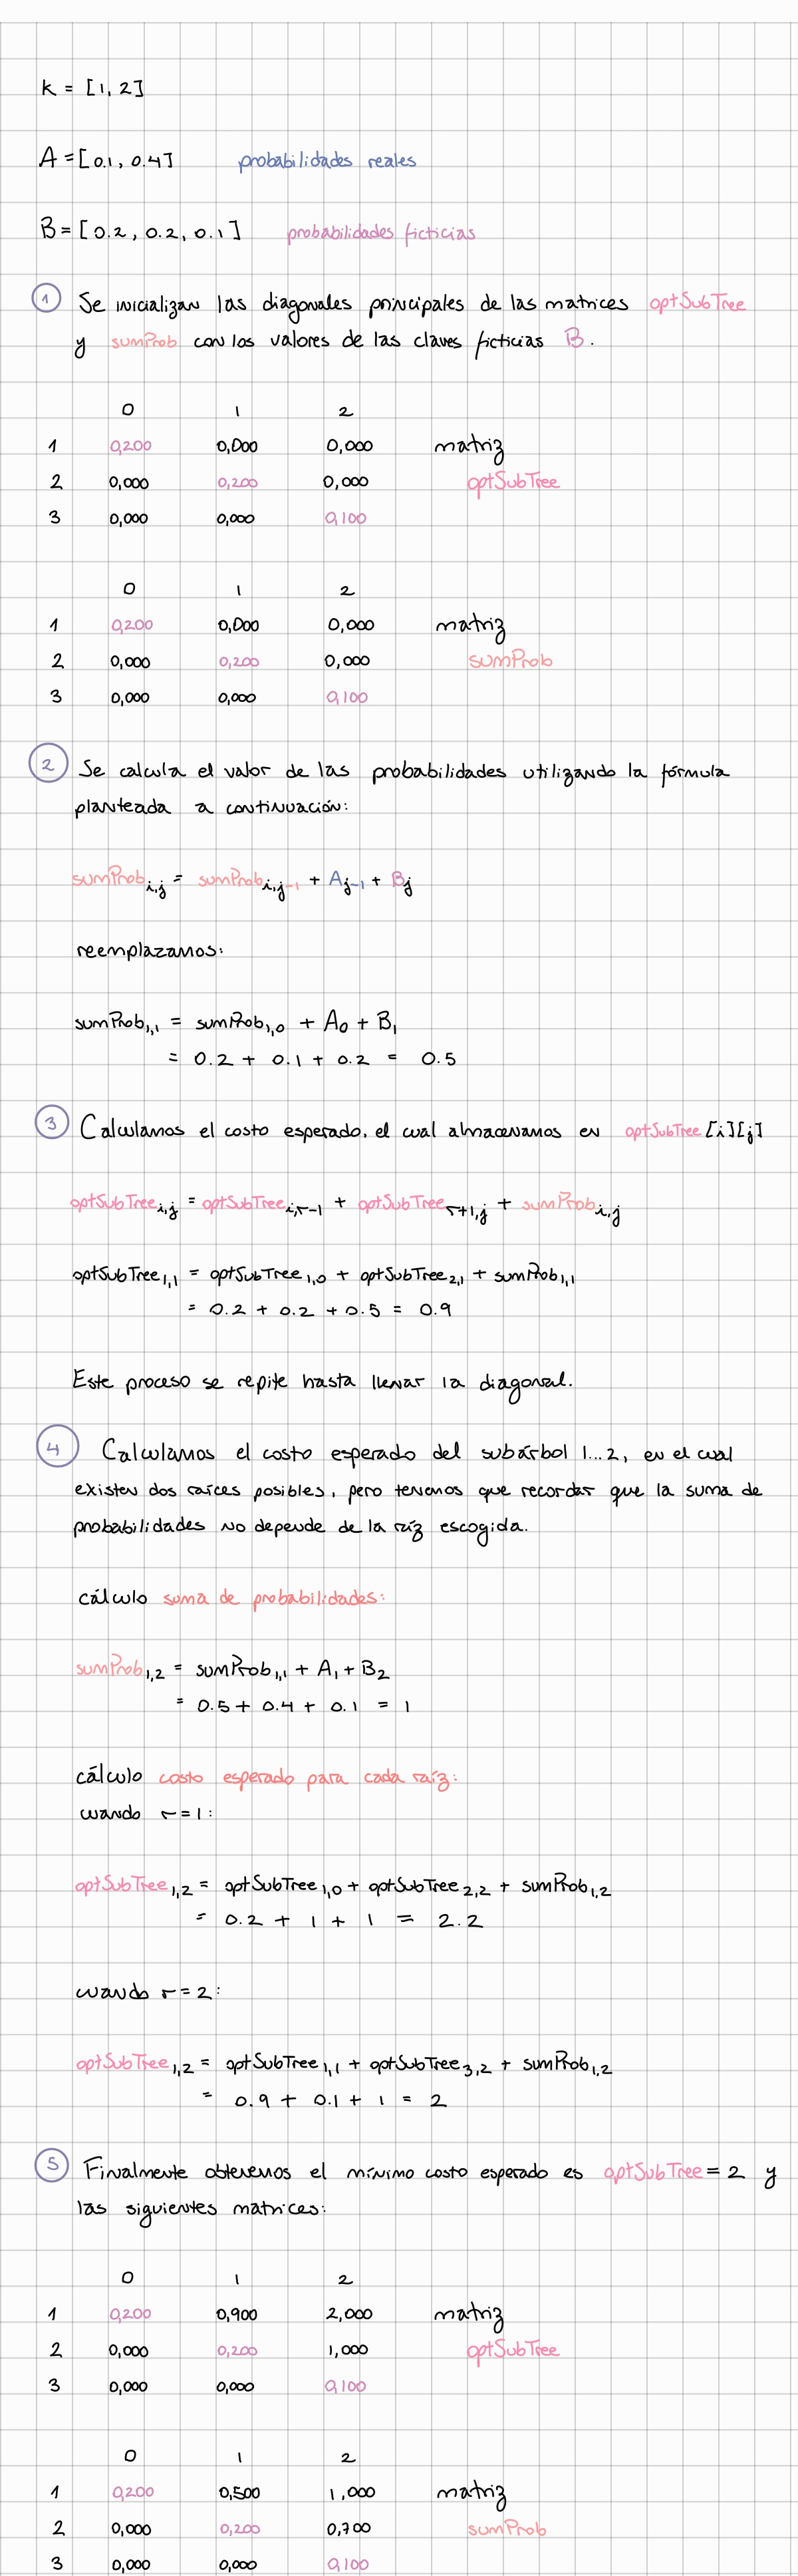

## 2.4. Ejecución del algoritmo paso a paso $(verbose = True)$

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

### Generador de instancias

In [ ]:
def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    a = list(arr[:n]) # Probabilidad de las claves reales
    b = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, a, b

### OBST recursivo

In [ ]:
k, a, b  = optimal_bst_instance_generator(5)
print("Claves del árbol: ", k)
print("\n")
cost = recursiveOBST(a, b, len(k), cont, verbose = True)
print(f"El costo óptimo es: {colored(round(cost, 2), 'red')}")

Claves del árbol:  [36, 44, 46, 53, 60]


Suma de probabilidades para los nodos 1...5 =  1.0


Costo del árbol de raíz 1 = 2.66
Se actualiza el valor del costo óptimo: 2.66



Costo del árbol de raíz 2 = 2.7
El valor del costo óptimo se mantiene: 2.66



Costo del árbol de raíz 3 = 2.44
Se actualiza el valor del costo óptimo: 2.44



Costo del árbol de raíz 4 = 2.77
El valor del costo óptimo se mantiene: 2.44



Costo del árbol de raíz 5 = 3.17
El valor del costo óptimo se mantiene: 2.44

El costo óptimo es: 2.44


### OBST dinámico (bottom up)

In [ ]:
k, a, b  = optimal_bst_instance_generator(5)
cont = [0]
print("Claves del árbol: ", k)
print("\n")
b = dynamicOBST(a, b, len(k), cont, verbose = True)

Claves del árbol:  [4, 31, 48, 56, 73]


Probabilidades de las claves reales: [0.044 0.112 0.172 0.078 0.021]
Probabilidades de las claves ficticias: [0.168 0.062 0.027 0.072 0.108 0.135]

Suma de probabilidades de sumProb[1][1] es = 0.27
El costo óptimo encontrado del árbol de raíz optSubTree[1][1] es =  0.51

Suma de probabilidades de sumProb[2][2] es = 0.2
El costo óptimo encontrado del árbol de raíz optSubTree[2][2] es =  0.29

Suma de probabilidades de sumProb[3][3] es = 0.27
El costo óptimo encontrado del árbol de raíz optSubTree[3][3] es =  0.37

Suma de probabilidades de sumProb[4][4] es = 0.26
El costo óptimo encontrado del árbol de raíz optSubTree[4][4] es =  0.44

Suma de probabilidades de sumProb[5][5] es = 0.26
El costo óptimo encontrado del árbol de raíz optSubTree[5][5] es =  0.51

Suma de probabilidades de sumProb[1][2] es = 0.41
El costo óptimo encontrado del árbol de raíz optSubTree[1][2] es =  0.87

Suma de probabilidades de sumProb[2][3] es = 0.45
El costo óptimo en

#**3. Tiempo de ejecución**

## Tiempo de ejecución OBST recursivo

El algoritmo **OBST recursivo** tiene un tiempo de ejecución $O(3^n)$.

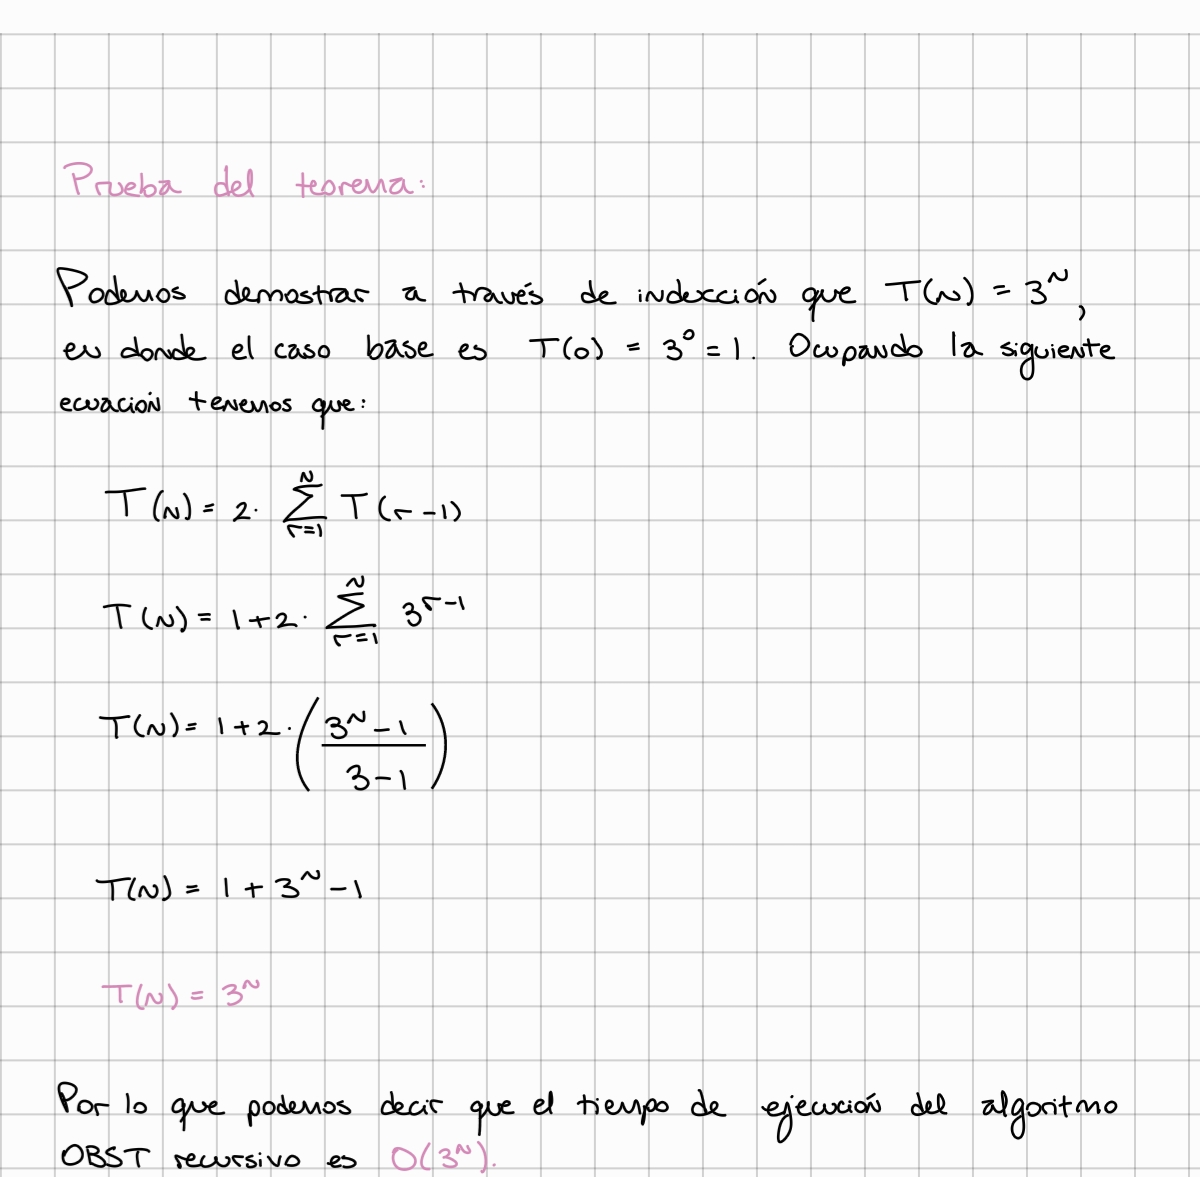

La complejidad espacial es $O(n)$, porque utiliza los mismos arreglos de entrada.

## Tiempo de ejecución OBST dinámico (bottom up)

El algoritmo **OBST dinámico** tiene un tiempo de ejecución $O(n^3)$.

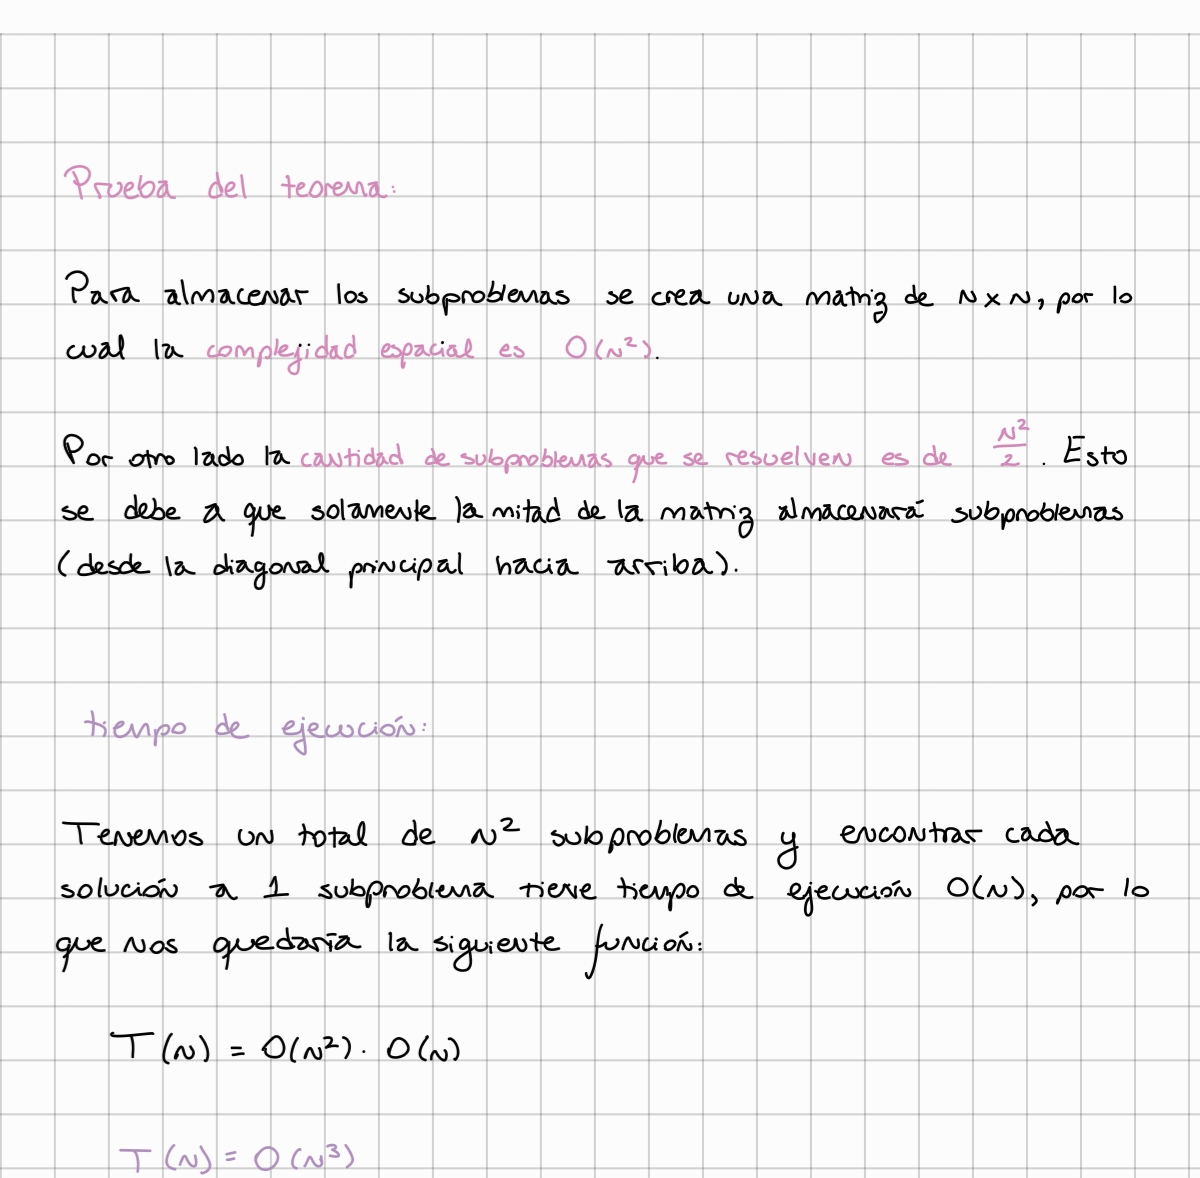

### Tiempo de ejecucion de la solucion DP

**Teorema**: $T(n) = O(n^3)$.

Observando la implementacion del algoritmo DP es facil intuir que el tiempo de ejecucion es $O(n^3)$ debido a que se basa en 3 ciclos anidados, cuyas iteraciones dependen de $n$.

El objetivo final del algoritmo es calcular $e[0, n]$ mas para esto es necesario calcular todos los subproblemas anteriores. 

La cantidad de subproblemas a resolver es $n^2 / 2$. Este valor corresponde a todas las permutaciones de los subproblemas para cada valor de $i$ y cada valor de $j$ (siendo $i$, $j$ los limites de izquierda y derecha del arreglo). 

La solucion DP se basa en la recursion de los problemas anteriores.

Se tiene un total de $n^2/2$ subproblemas y encontrar cada solucion toma una iteracion de $i$ a $j$ (cuyos valores son directamente dependientes de $n$).

## Complejidad espacial de las soluciones

La cantidad de subproblemas a resolver es $n^2 / 2$. Este valor corresponde a todas las permutaciones de los subproblemas para cada valor de $i$ y cada valor de $j$ (siendo $i$, $j$ los limites de izquierda y derecha del arreglo). Por lo que la complejidad espacial de la solucion dinamica esta limitada por las matrices. Tenemos tres matrices de tamano nxn por lo que la complejidad espacial de la solucion dinamica es O(n^2).

Para el caso de la solucion recursiva (y tambien la dinamica) se considera como espacio los arreglos de entrada del arreglo como parte de la complejidad espacial. Esto es debido a que a traves de las recursiones, se utilizan los mismos arreglos. Por lo que la complejidad espacial de la solucion recursiva es lineal O(n). 

# **4. Correctitud**

## Estructura óptima

Se sabe que si un BST es óptimo, luego todos sus sub-árboles $T'$ son óptimos.

Se analizan los sub-árboles para describir la subestructura óptima.

Se considera un sub-árbol $T'$ de un OBST. Para que se cumpla la propiedad de la subestructura óptima es necesario que $T'$  contenga sus llaves en un rango contiguo $k_i..k_j$.

Se elige una llave arbitraria $k_r$ (con $i \leq r \leq j$) cuya clave corresponde a la raíz de algún OBST, conteniendo las claves en dicho intervalo.

En el sub-árbol izquierdo se encuentran las llaves $k_i..k_{r-1}$. Mientras que en el sub-árbol derecho se encuentran las llaves $k_{r+1} .. k_j$. 

Para evitar problemas con el cálculo del costo. Se adopta la convención de que un árbol conteniendo las llaves $k_i..k_{i-1}$ no posee claves.

Teorema: El algoritmo obtiene el costo mínimo (y el árbol correspondiente) correctamente.

## Resolución del subproblema

Se define el subproblema de la implementación bottom up como encontrar un BST tal que este contenga las llaves en el intervalo $k_i..k_j$.

Se define $e$ como una matriz bidimensional donde se almacenarán las soluciones a los subproblemas. Luego la posición $e[i][j]$ corresponde al costo mínimo de búsqueda para un BST con las llaves $k_i..k_j$. El problema está resuelto cuando se calcula $e[0][n]$. En este punto se presentan dos posibles casos

**Caso 1**: $j < i$. En este caso el BST no tiene elementos (a excepción de una clave falsa, la cual no es considerada). 

**Caso 2**: $j\geq i$. En este caso es necesario definir la raíz arbitraria en el intervalo para recorrer todas las raíces posibles $k_r$ para las cuales se buscará
el costo mínimo de dichos BST.

Es menester considerar que en el caso de procesar un sub-árbol, al costo se le suman todas las probabilidades posibles en sí mismo. (el sub-árbol).

## Función recurrente para solucionar el problema

Para un BST de llaves $k_i..k_j$ se define la suma (acumulada) de las probabilidades como
$$
w(i,j) = \sum_{l=1}^j p_l
$$

Luego, siendo $k_r$ la raíz de un sub-árbol conteniendo las llaves $k_i..k_j$, se tiene que:

$$
e(i, j) = p_r +
e(i, r-1) + w(1, r-1) +
e(r+1, j) + w(r+1,j)
$$

Luego, se elige el árbol óptimo como aquel que provee un costo esperado de búsqueda óptimo (mínimo).

## Prueba de correctitud

Se define $l$ como la longitud del problema a resolver. Para resolver todos los subproblemas se itara desde $l=1$ hasta $l = n$.

**Teorema**: la matriz $e$ contiene el costo mínimo de los $l$ subproblemas.

**Inicio**: Antes de la primea iteración. la matriz de soluciones $e$ no tiene valores guardados.

**Mantenimiento**: Se asume que la matriz $e$ contiene la soluciones de todos los subproblemas anteriores, por lo que el subproblema actual ($l$) es resuelto correctamente.

**Finalización**: Al finalizar la última iteración de $l$, el costo mínimo del problema inicial es calculador correctamente, basándose de sus subproblemas.

# **5. Experimentos.**

## 5.1. OBST recursivo v/s dinámico

A continuación se muestra gráficamente una comparación entre los tiempos de ejecución del algoritmo de optimal binary search tree recursivo y optimal binary search tree dinámico en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $10$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambos algoritmos.

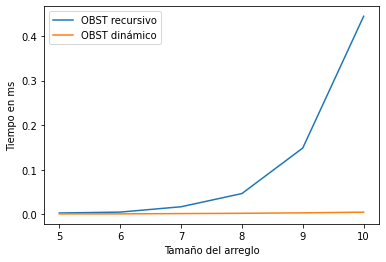

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]
y1=[]
y2=[]

for n in range(5,11):
  k,a,b  = optimal_bst_instance_generator(n)
  cont = [0]
  verbose = False
  t1 = repeat(setup="from __main__ import recursiveOBST", stmt=f"recursiveOBST({a}, {b}, {n}, {cont}, {verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamicOBST", stmt=f"dynamicOBST({a}, {b}, {n}, {cont}, {verbose})", repeat=1, number=10)
  x.append(n)
  y1.append(t1)
  y2.append(t2)


plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["OBST recursivo", "OBST dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Como se puede apreciar del gráfico la implementación dinámica es bastante más eficiente que su ejecución recursiva. Esto se debe a que OBST recursivo tiene un tiempo de ejecución exponencial y una complejidad $O(3^n)$, mientras que su implementación dinámica tiene un tiempo de ejecución polinomial y una complejidad de $O(n^3)$, la cual es mucho menor a la primera mencionada. 




## 5.2. Optimal BST con raíz fija

En los siguientes gráficos se realizarán comparaciones entre las implementaciones normales y modificadas del algoritmo OBST, en el cual se ocupará una raíz fija para realizar el proceso. 

## Códigos modificados

In [ ]:
import numpy as np

def modifiedOBST(a,b,n,cont):
  r = np.argmax(a) + 1
  suma = sum(a[:]) + sum(b[:])
  optSubTree = optimalCost(a, b, 1, r-1, cont) + optimalCost(a, b, r+1, n, cont) + suma
  return optSubTree

In [ ]:
def modifiedDynamicOBST(a,b,n,cont):
  # Raiz con mayor probabilidad
  r = np.argmax(a)
  suma = sum(a[:]) + sum(b[:])
  optSubTree = dynamicOBST(a[:r],b[:r+1],r, cont)[0] + dynamicOBST(a[:r],b[:r+1],r, cont)[0] + suma
  return optSubTree

## Comparación de costo óptimo 

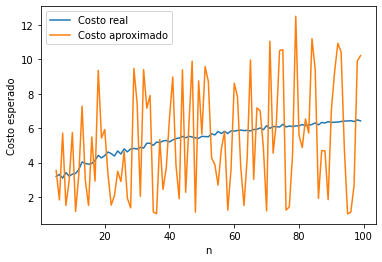

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=[] 
y1=[]
y2=[]

for n in range(5,100):
  k, a, b = optimal_bst_instance_generator(n)
  cont = [0]
  o = dynamicOBST(a, b, len(k), cont)[0]
  m = modifiedDynamicOBST(a, b, len(k), cont)

  x.append(n)
  y1.append(o)
  y2.append(m)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Costo real", "Costo aproximado"])

plt.xlabel('n')
plt.ylabel('Costo esperado')
plt.show()

## Tiempo de ejecución implementación recursiva v/s recursiva modificada

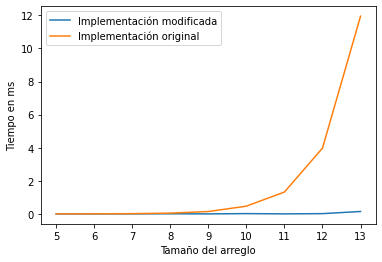

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]
y1=[]
y2=[]

for n in range(5,14):

  k,a,b  = optimal_bst_instance_generator(n)
  cont = [0]

  t1 = repeat(setup="from __main__ import modifiedOBST", stmt=f"modifiedOBST({a}, {b}, {n}, {cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import recursiveOBST", stmt=f"recursiveOBST({a}, {b}, {n}, {cont})", repeat=1, number=10)
  x.append(n)
  y1.append(t1)
  y2.append(t2)


plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Implementación modificada", "Implementación original"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

## Tiempo de ejecución implementación dinámica v/s dinámica modificada

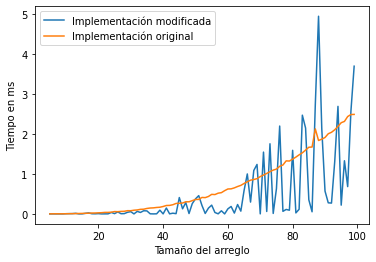

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[] 
y1=[]
y2=[]

for n in range(5,100):

  k,a,b  = optimal_bst_instance_generator(n)
  cont = [0]

  t1 = repeat(setup="from __main__ import modifiedDynamicOBST", stmt=f"modifiedDynamicOBST({a}, {b}, {n}, {cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamicOBST", stmt=f"dynamicOBST({a}, {b}, {n}, {cont})", repeat=1, number=10)
  x.append(n)
  y1.append(t1)
  y2.append(t2)


plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Implementación modificada", "Implementación original"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**





1.   Como se puede apreciar en el gráfico de comparación de costo mínimo, el costo esperado casi no coincide con el costo real, por lo que esta aproximación no es muy segura a la hora de llegar a diversas conclusiones. 

2.   En el gráfico de comparación de implementación recursiva original y modificada se puede apreciar que cuando empieza a crecer el tamaño del arreglo la diferencia respecto a la eficiencia de estas ejecuciones se resalta más, donde el algoritmo recursivo modificado es mucho más eficiente que el original. 

3. En el gráfico de comparación de implementación dinámica original y modificada se puede apreciar que cuando el tamaño del arreglo empieza a aumentar la ejecución modificada se vuelve bastante inestable, mientras que la implementación original se mantiene en una curva de crecimiento cúbica. 

De los experimentos realizados podemos concluir que para los arreglos de tamaño pequeño no existe una gran diferencia entre ocupar un algoritmo original o uno con raíz fija, pero cuando el arreglo comienza a crecer las implementaciones modificadas con esta caracterítica son mucho más eficientes que su versión original. 

